### Explore how Social Support & Freedom to make life decisions impact the Happiness Score

In [5]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

##### Bring group data file in and reduce to required columns 

In [6]:
#load and read 2015 merged file
csv_file = Path("../Resources/2015_Life_happiness_mergedupdate.csv")
life_happiness_df = pd.read_csv(csv_file)
life_happiness_df.head()

,Unnamed: 0,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,2,Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [7]:
#create a reduced df for the required columns
social_freedom_df = life_happiness_df[["Country", "continent", "happiness_score", "family", "freedom", "Life expectancy "]].copy()
social_freedom_df = social_freedom_df.dropna(how="any")

#save this reduced df for use on other workbooks
social_freedom_df.to_csv("../Resources/PB_support_freedom.csv", index=False, header=True)
social_freedom_df


,Country,continent,happiness_score,family,freedom,Life expectancy
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0
1,Albania,Europe,4.644,0.803685,0.381499,77.8
2,Algeria,Africa,5.872,1.146217,0.233336,75.6
5,Argentina,South America,6.599,1.440451,0.494519,76.3
6,Armenia,Asia,4.376,1.007484,0.198303,74.8
...,...,...,...,...,...,...
175,Uruguay,South America,6.454,1.412228,0.579392,77.0
176,Uzbekistan,Asia,5.971,1.548969,0.658249,69.4
180,Yemen,Asia,3.593,0.935382,0.249464,65.7
181,Zambia,Africa,4.514,1.003187,0.461603,61.8


##### View results for Continents

Happiness median is: 5.329999924
Happiness Outliers: Series([], Name: happiness_score, dtype: float64)
Family median is: 1.2689367534999998
Family Outliers for: 17     0.435300
163    0.431883
Name: family, dtype: float64
Freedom median is: 0.4417459515
Freedom Outliers for: Series([], Name: freedom, dtype: float64)


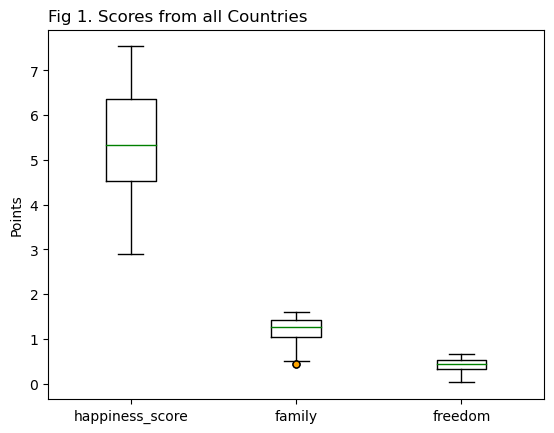

In [8]:
#Boxplot for all 122 countries

#styling
outlier =dict(marker="o", markerfacecolor="orange", markersize=5, markeredgecolor="black")##
boxplot = dict(color='black')
median = dict(color="green")
whiskers = dict(color="black")
caps = dict(color="black")

#plot
ax = social_freedom_df[['happiness_score', 'family', 'freedom']].plot(kind="box", flierprops=outlier, boxprops=boxplot, medianprops=median, whiskerprops=whiskers, capprops=caps)
plt.title("Fig 1. Scores from all Countries", loc="left")
plt.ylabel("Points")

#Happiness Score
happy_subset = social_freedom_df['happiness_score']
happy_quartiles = happy_subset.quantile([0.25,0.5,0.75])
happy_lowerq = happy_quartiles[0.25]
happy_upperq = happy_quartiles[0.75]
happy_iqr = happy_upperq - happy_lowerq
happy_lower_bound = happy_lowerq - (1.5*happy_iqr)
happy_upper_bound = happy_upperq + (1.5*happy_iqr)
happy_outliers = (happy_subset.loc[(happy_subset < happy_lower_bound) | (happy_subset > happy_upper_bound)])
happy_median = social_freedom_df['happiness_score'].median()
print(f'Happiness median is: {happy_median}')
print(f"Happiness Outliers: {happy_outliers}")

#Family/Support portion of score
family_subset = social_freedom_df['family']
family_quartiles = family_subset.quantile([0.25,0.5,0.75])
family_lowerq = family_quartiles[0.25]
family_upperq = family_quartiles[0.75]
family_iqr = family_upperq - family_lowerq
family_lower_bound = family_lowerq - (1.5*family_iqr)
family_upper_bound = family_upperq + (1.5*family_iqr)
family_outliers = (family_subset.loc[(family_subset < family_lower_bound) | (family_subset > family_upper_bound)])
family_median = social_freedom_df['family'].median()
print(f'Family median is: {family_median}')
print(f"Family Outliers for: {family_outliers}")

#Freedom portion of score
freedom_subset = social_freedom_df['freedom']
freedom_quartiles = freedom_subset.quantile([0.25,0.5,0.75])
freedom_lowerq = freedom_quartiles[0.25]
freedom_upperq = freedom_quartiles[0.75]
freedom_iqr = freedom_upperq - freedom_lowerq
freedom_lower_bound = freedom_lowerq - (1.5*freedom_iqr)
freedom_upper_bound = freedom_upperq + (1.5*freedom_iqr)
freedom_outliers = (freedom_subset.loc[(freedom_subset < freedom_lower_bound) | (freedom_subset > freedom_upper_bound)])
freedom_median = social_freedom_df['freedom'].median()
print(f'Freedom median is: {freedom_median}')
print(f"Freedom Outliers for: {freedom_outliers}")

plt.show()


In [9]:
#list of continents for for loop
continents = social_freedom_df["continent"].unique()
continent_list = [i for i in continents]
print(continent_list)

continent_results = []

['Asia', 'Europe', 'Africa', 'South America', 'Australia', 'North America']


Happiness Median for Asia is: 5.269000053
Happiness Outliers for Asia: Series([], Name: happiness_score, dtype: float64)
Family Median for Asia is: 1.259698749
Family Outliers for Asia: 0     0.581543
61    0.570615
Name: family, dtype: float64
Freedom Median for Asia is: 0.443323463
Freedom Outliers for Asia: 0    0.10618
Name: freedom, dtype: float64


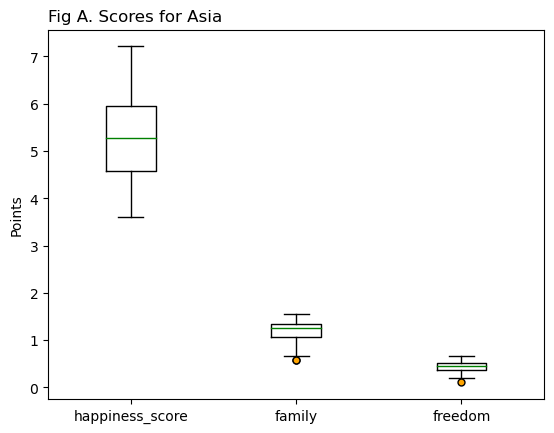

Happiness Median for Europe is: 5.9685001374999995
Happiness Outliers for Europe: Series([], Name: happiness_score, dtype: float64)
Family Median for Europe is: 1.4491153955
Family Outliers for Europe: 1      0.803685
20     1.069336
40     0.967983
132    1.150091
Name: family, dtype: float64
Freedom Median for Europe is: 0.474676773
Freedom Outliers for Europe: Series([], Name: freedom, dtype: float64)


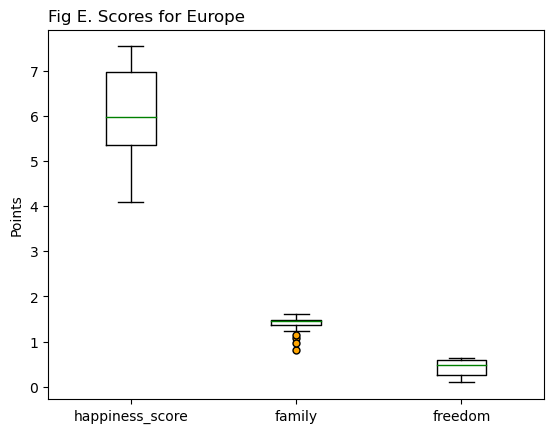

Happiness Median for Africa is: 4.291999817
Happiness Outliers for Africa: Series([], Name: happiness_score, dtype: float64)
Family Median for Africa is: 0.997471392
Family Outliers for Africa: Series([], Name: family, dtype: float64)
Freedom Median for Africa is: 0.380426139
Freedom Outliers for Africa: 26     0.059901
103    0.096098
Name: freedom, dtype: float64


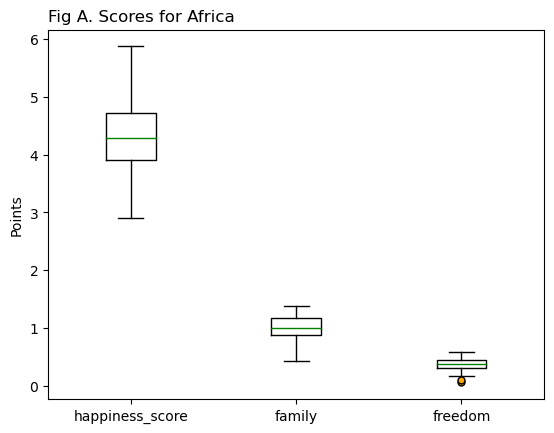

Happiness Median for South America is: 6.039499998
Happiness Outliers for South America: 67    3.507
70    3.603
Name: happiness_score, dtype: float64
Family Median for South America is: 1.3277168869999998
Family Outliers for South America: 67    0.791245
70    0.640450
Name: family, dtype: float64
Freedom Median for South America is: 0.4643529955
Freedom Outliers for South America: 70    0.03037
Name: freedom, dtype: float64


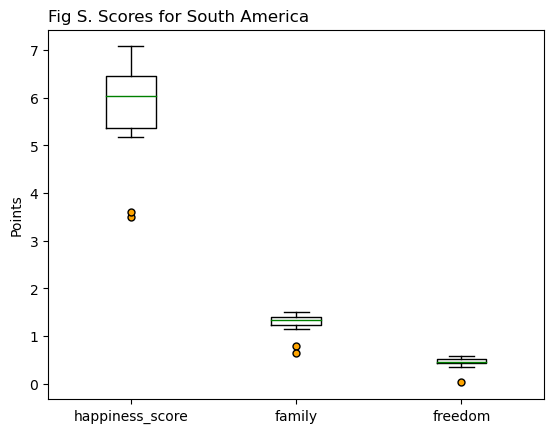

Happiness Median for Australia is: 7.299000025
Happiness Outliers for Australia: Series([], Name: happiness_score, dtype: float64)
Family Median for Australia is: 1.529118538
Family Outliers for Australia: Series([], Name: family, dtype: float64)
Freedom Median for Australia is: 0.6078347559999999
Freedom Outliers for Australia: Series([], Name: freedom, dtype: float64)


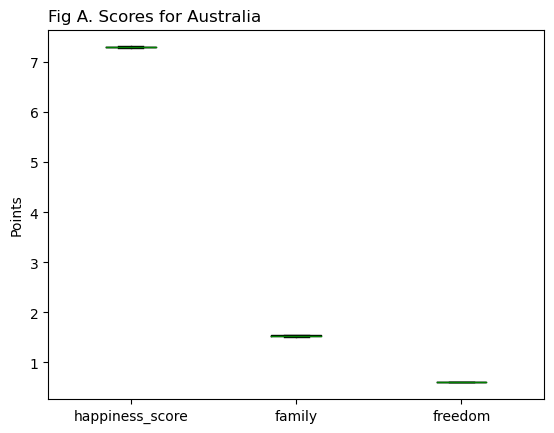

Happiness Median for North America is: 6.947000027
Happiness Outliers for North America: Series([], Name: happiness_score, dtype: float64)
Family Median for North America is: 1.3461055755
Family Outliers for North America: Series([], Name: family, dtype: float64)
Freedom Median for North America is: 0.51191546
Freedom Outliers for North America: Series([], Name: freedom, dtype: float64)


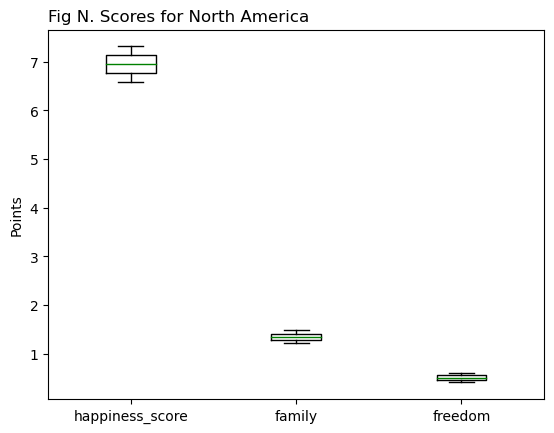

In [10]:
#Boxplot for each continent, using for loop

#styling
outlier =dict(marker="o", markerfacecolor="orange", markersize=5, markeredgecolor="black")
boxplot = dict(color='black')
median = dict(color="green")
whiskers = dict(color="black")
caps = dict(color="black")

#list for countries within continent
continent_countries = []

#run for loop on each continent from list
for x in continent_list:
   
    #locate rows for each continent and plot
    continent_df = social_freedom_df.loc[social_freedom_df["continent"] == x]
    ax = continent_df[['happiness_score', 'family', 'freedom']].plot(kind="box", flierprops=outlier, boxprops=boxplot, medianprops=median, 
                                                                         whiskerprops=whiskers, capprops=caps, )
    plt.title((f'Fig {x[0]}. Scores for {x}'), loc="left")
    plt.ylabel("Points")
    
    #run calcs for IQR

    #Happiness Score
    cont_happy_subset = continent_df['happiness_score']
    cont_happy_quartiles = cont_happy_subset.quantile([0.25,0.5,0.75])
    cont_happy_lowerq = cont_happy_quartiles[0.25]
    cont_happy_upperq = cont_happy_quartiles[0.75]
    cont_happy_iqr = cont_happy_upperq - cont_happy_lowerq
    cont_happy_lower_bound = cont_happy_lowerq - (1.5*cont_happy_iqr)
    cont_happy_upper_bound = cont_happy_upperq + (1.5*cont_happy_iqr)
    cont_happy_outliers = (cont_happy_subset.loc[(cont_happy_subset < cont_happy_lower_bound) | (cont_happy_subset > cont_happy_upper_bound)])
    cont_happy_median = continent_df['happiness_score'].median()
    print(f'Happiness Median for {x} is: {cont_happy_median}')
    print(f"Happiness Outliers for {x}: {cont_happy_outliers}")
    
    #Family/Support portion of score
    cont_family_subset = continent_df['family']
    cont_family_quartiles = cont_family_subset.quantile([0.25,0.5,0.75])
    cont_family_lowerq = cont_family_quartiles[0.25]
    cont_family_upperq = cont_family_quartiles[0.75]
    cont_family_iqr = cont_family_upperq - cont_family_lowerq
    cont_family_lower_bound = cont_family_lowerq - (1.5*cont_family_iqr)
    cont_family_upper_bound = cont_family_upperq + (1.5*cont_family_iqr)
    cont_family_outliers = (cont_family_subset.loc[(cont_family_subset < cont_family_lower_bound) | (cont_family_subset > cont_family_upper_bound)])
    cont_family_median = continent_df['family'].median()
    print(f'Family Median for {x} is: {cont_family_median}')
    print(f"Family Outliers for {x}: {cont_family_outliers}")

    #Freedom portion of score
    cont_freedom_subset = continent_df['freedom']
    cont_freedom_quartiles = cont_freedom_subset.quantile([0.25,0.5,0.75])
    cont_freedom_lowerq = cont_freedom_quartiles[0.25]
    cont_freedom_upperq = cont_freedom_quartiles[0.75]
    cont_freedom_iqr = cont_freedom_upperq - cont_freedom_lowerq
    cont_freedom_lower_bound = cont_freedom_lowerq - (1.5*cont_freedom_iqr)
    cont_freedom_upper_bound = cont_freedom_upperq + (1.5*cont_freedom_iqr)
    cont_freedom_outliers = (cont_freedom_subset.loc[(cont_freedom_subset < cont_freedom_lower_bound) | (cont_freedom_subset > cont_freedom_upper_bound)])
    cont_freedom_median = continent_df['freedom'].median()
    print(f'Freedom Median for {x} is: {cont_freedom_median}')
    print(f"Freedom Outliers for {x}: {cont_freedom_outliers}")

    plt.show()



##### Plot results for impact of Social Support and Freedom to make life decision on each country

In [11]:
#add columns for percentage of happiness score based on support or freedom
social_freedom_df["% of Happiness from Support"] = (social_freedom_df["family"] / social_freedom_df["happiness_score"]) * 100
social_freedom_df["% of Happiness from Freedom"] = (social_freedom_df["freedom"] / social_freedom_df["happiness_score"]) * 100
social_freedom_df.head()

,Country,continent,happiness_score,family,freedom,Life expectancy,% of Happiness from Support,% of Happiness from Freedom
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0,15.327974,2.798617
1,Albania,Europe,4.644,0.803685,0.381499,77.8,17.305884,8.214871
2,Algeria,Africa,5.872,1.146217,0.233336,75.6,19.520051,3.973702
5,Argentina,South America,6.599,1.440451,0.494519,76.3,21.828325,7.493851
6,Armenia,Asia,4.376,1.007484,0.198303,74.8,23.022937,4.531610


In [12]:
#sort in order of happiness score, low to high, eg happiest to saddest
happy_social_freedom_df = social_freedom_df.sort_values("happiness_score", ascending=False)
#happy_social_freedom_df.head()

#data points for happiness score plots
happy = happy_social_freedom_df["happiness_score"]
happy_country = happy_social_freedom_df["Country"]



#sort in order of life expectancy, longest to shortest
life_social_freedom_df = social_freedom_df.sort_values("Life expectancy ", ascending=False)
#life_social_freedom_df.head()

#data points for life expectancy plots
life = life_social_freedom_df["Life expectancy "]
life_country = life_social_freedom_df["Country"]



In [13]:
#isolate top 20 countries for further exploration

#top 20 on happiness
top_happy_20 = happy_social_freedom_df.head(20)
top_happy_20

#data points for top 20 plots against happiness
top_happy = top_happy_20["happiness_score"]
top_country = top_happy_20["Country"]


#top 20 on life expectancy
top_life_20 = life_social_freedom_df.head(20)
#top_life_20

#data points for top 20 plots against happiness
top_life = top_life_20["Life expectancy "]
top_life_country = top_life_20["Country"] 



In [14]:
#isolate bottom 20 countries

#bottom 20 on happiness
bottom_happy_20 = happy_social_freedom_df.tail(20)
#bottom_happy_20

#data points for bottom 20 plots against happiness
bottom_happy = bottom_happy_20["happiness_score"]
bottom_country = bottom_happy_20["Country"]


#bottom 20 on life expectancy
bottom_life_20 = life_social_freedom_df.tail(20)
bottom_life_20

#data points for bottom 20 plots against life expectancy
bottom_life = bottom_life_20["Life expectancy "]
bottom_life_country = bottom_life_20["Country"]

##### Plot impact of Social Support on Happiness Score

The r-value of Support is: 0.03487025036123003


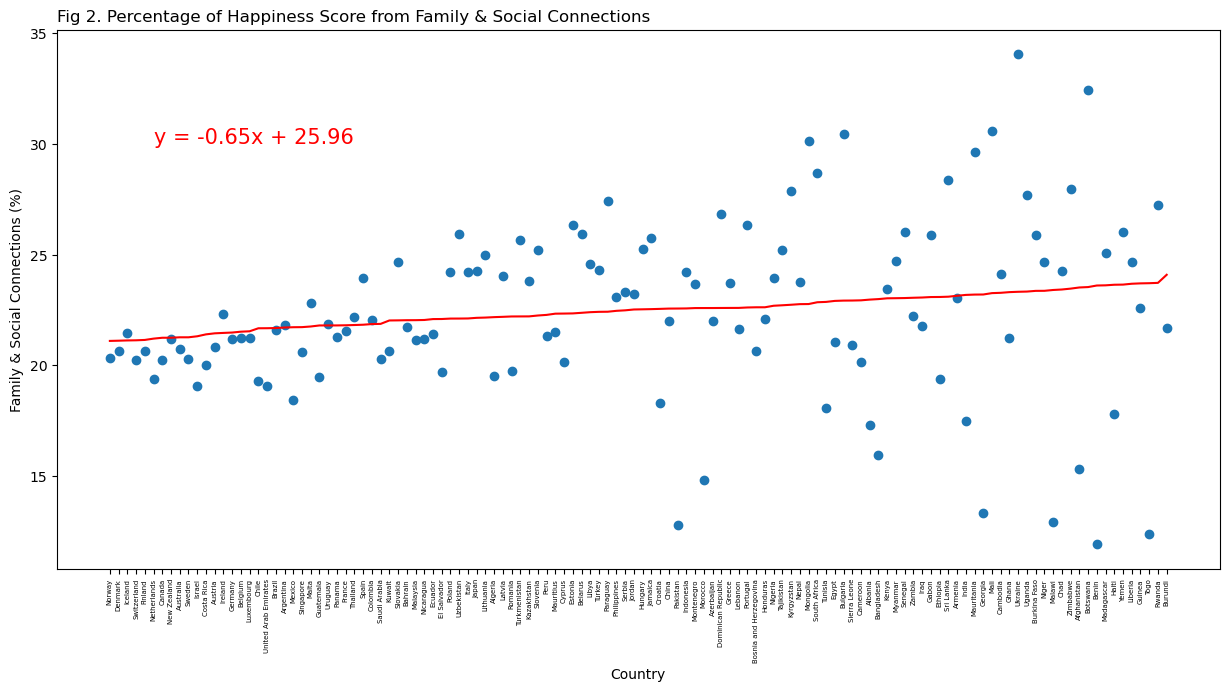

In [15]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a higher happiness score

#axis
x_support_percent = happy_social_freedom_df["Country"]
y_support_percent = happy_social_freedom_df["% of Happiness from Support"]

#line regression and line equation
sup_slope, sup_int, sup_r, sup_p, sup_std_err = st.linregress(happy, y_support_percent)
sup_fit = sup_slope * happy + sup_int
sup_line = "y = " + str(round(sup_slope, 2)) + "x + " + str(round(sup_int, 2))

#increase plot size for large number of countries
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter & line regression
plt.scatter(x_support_percent, y_support_percent)
plt.plot(x_support_percent, sup_fit, color='red')
plt.title("Fig 2. Percentage of Happiness Score from Family & Social Connections", loc='left')
plt.xlabel("Country")
plt.ylabel("Family & Social Connections (%)")
plt.annotate(sup_line, (5,30), fontsize=15, color='red')


#style xticks
plt.xticks(happy_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {sup_r**2}')

plt.show()
   

The r-value of Support is: 0.03487025036123003


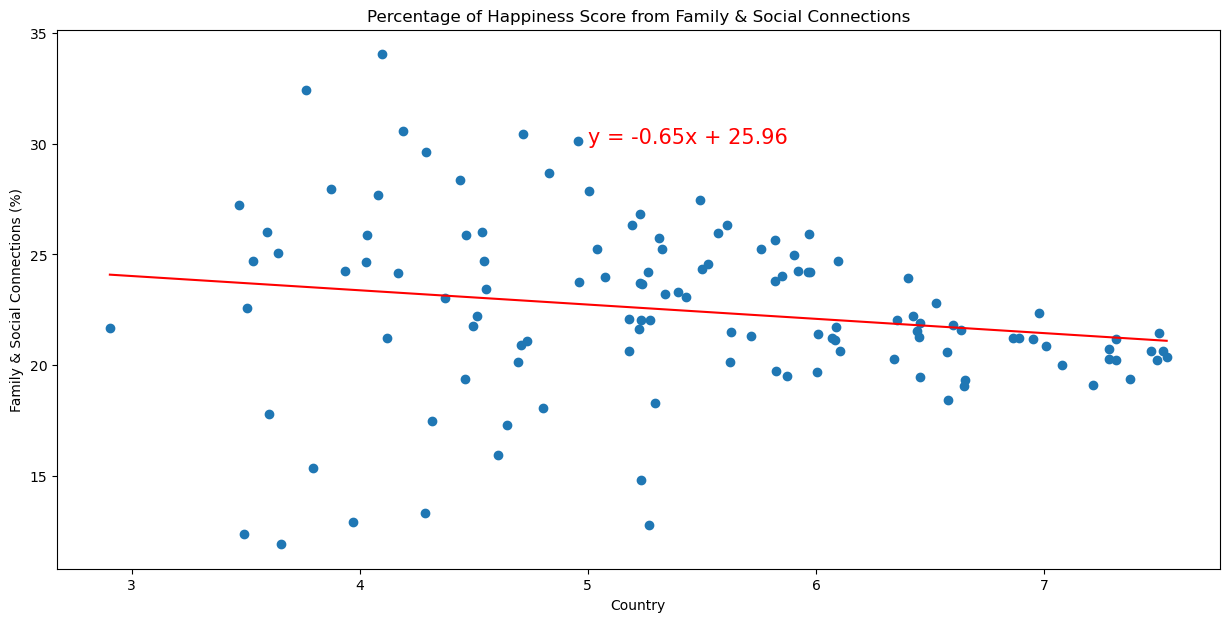

In [16]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a higher happiness score

#axis
x_support_percent = happy_social_freedom_df["happiness_score"]
y_support_percent = happy_social_freedom_df["% of Happiness from Support"]

#line regression and line equation
sup_slope, sup_int, sup_r, sup_p, sup_std_err = st.linregress(x_support_percent, y_support_percent)
sup_fit = sup_slope * x_support_percent + sup_int
sup_line = "y = " + str(round(sup_slope, 2)) + "x + " + str(round(sup_int, 2))

#increase plot size for large number of countries
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter & line regression
plt.scatter(x_support_percent, y_support_percent)
plt.plot(x_support_percent, sup_fit, color='red')
plt.title("Percentage of Happiness Score from Family & Social Connections")
plt.xlabel("Country")
plt.ylabel("Family & Social Connections (%)")
plt.annotate(sup_line, (5,30), fontsize=15, color='red')


#style xticks
#plt.xticks(happy_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {sup_r**2}')

plt.show()
   

The r-value of Support in the Top 20 Happiest Countries is: 0.0003238620138579879


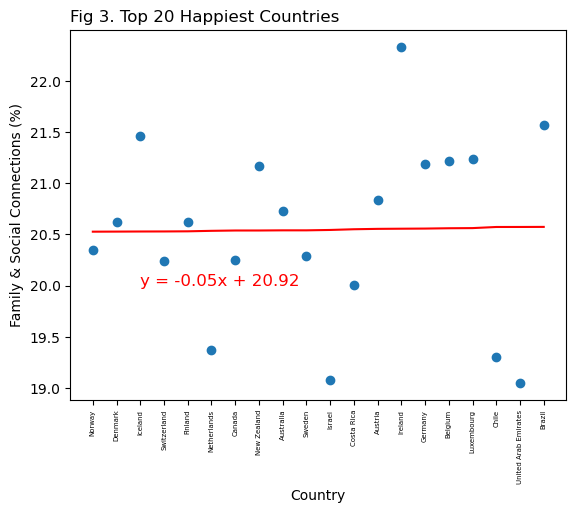

In [17]:
#scatter plots and line regression on top 20 happiest countries
#does getting more happiness from family and social connections correlate to a higher happiness score

#axis
x_support_top20 = top_happy_20["Country"]
y_support_top20 = top_happy_20["% of Happiness from Support"]

#line regression and line equation
sup20_slope, sup20_int, sup20_r, sup20_p, sup20_std_err = st.linregress(top_happy, y_support_top20)
sup20_fit = sup20_slope * top_happy + sup20_int
sup20_line = "y = " + str(round(sup20_slope, 2)) + "x + " + str(round(sup20_int, 2))

#plot scatter and line regression
plt.scatter(x_support_top20, y_support_top20)
plt.plot(x_support_top20, sup20_fit, color='red')
plt.title("Fig 3. Top 20 Happiest Countries", loc='left')
plt.xlabel("Country")
plt.ylabel("Family & Social Connections (%)")
plt.annotate(sup20_line, (2,20), fontsize=12, color='red')

#style xticks
plt.xticks(top_country, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Support in the Top 20 Happiest Countries is: {sup20_r**2}')

plt.show()


The r-value of Support in the Bottom 20 Happiest Countries is: 0.052543131164214614


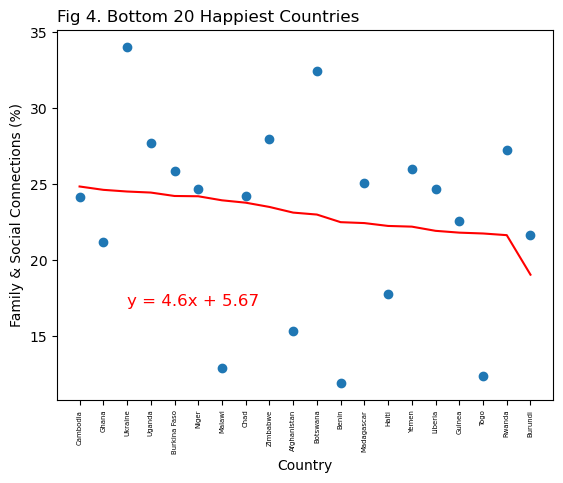

In [18]:
#scatter plots and line regression on bottom 20 happiest countries
#does getting more happiness from family and social connections correlate to a lower happiness score

#axis
x_support_bot20 = bottom_happy_20["Country"]
y_support_bot20 = bottom_happy_20["% of Happiness from Support"]

#line regression and line equation
suplast20_slope, suplast20_int, suplast20_r, suplast20_p, suplast20_std_err = st.linregress(bottom_happy, y_support_bot20)
suplast20_fit = suplast20_slope * bottom_happy + suplast20_int
suplast20_line = "y = " + str(round(suplast20_slope, 2)) + "x + " + str(round(suplast20_int, 2))

#plot scatter and line regression
plt.scatter(x_support_bot20, y_support_bot20)
plt.plot(x_support_bot20, suplast20_fit, color='red')
plt.title("Fig 4. Bottom 20 Happiest Countries", loc='left')
plt.xlabel("Country")
plt.ylabel("Family & Social Connections (%)")
plt.annotate(suplast20_line, (2,17), fontsize=12, color='red')

#style xticks
plt.xticks(bottom_country, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Support in the Bottom 20 Happiest Countries is: {suplast20_r**2}')

plt.show()

##### Plot impact of Freedom to make life decisions on Happiness Score

The r-value of freedom is: 0.003299615432309994


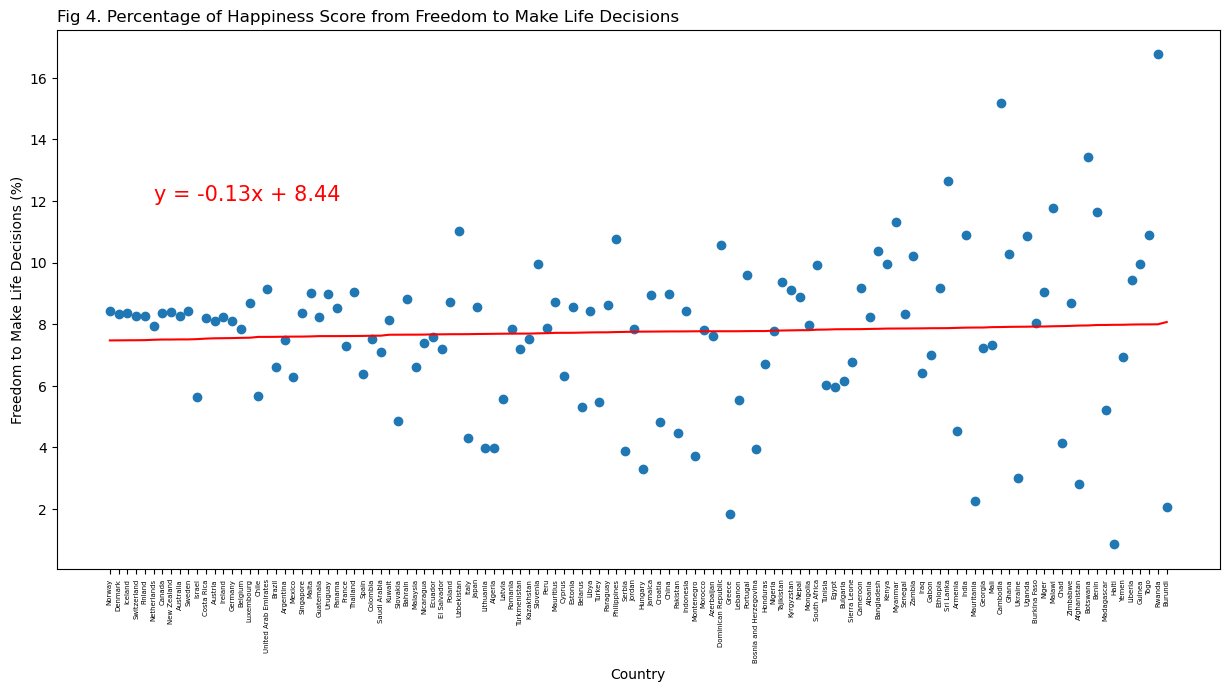

In [19]:
#scatter plot and line regression
#does getting more freedom to make life correlate to a higher happiness score

#axis
x_freedom_percent = happy_social_freedom_df["Country"]
y_freedom_percent = happy_social_freedom_df["% of Happiness from Freedom"]

#line regression and line equation
free_slope, free_int, free_r, free_p, free_std_err = st.linregress(happy, y_freedom_percent)
free_fit = free_slope * happy + free_int
free_line = "y = " + str(round(free_slope, 2)) + "x + " + str(round(free_int, 2))

#increase plot size for volume of x-axis values
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter and line regression
plt.scatter(x_freedom_percent, y_freedom_percent)
plt.plot(x_freedom_percent, free_fit, color='red')
plt.title("Fig 4. Percentage of Happiness Score from Freedom to Make Life Decisions", loc='left')
plt.xlabel("Country")
plt.ylabel("Freedom to Make Life Decisions (%)")
plt.annotate(free_line, (5,12), fontsize=15, color='red')

#style xticks
plt.xticks(happy_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of freedom is: {free_r**2}')

plt.show()


The r-value of Freedom in the Top 20 Happiest Countries is: 0.10235464282683006


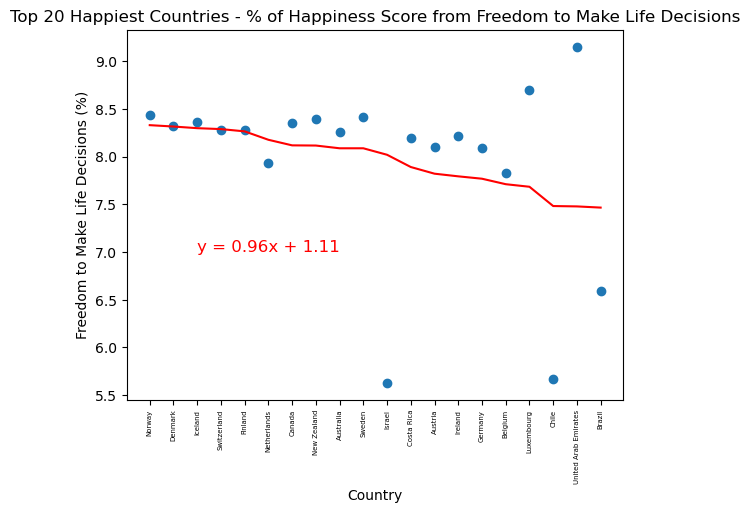

In [20]:
#scatter plots and line regression on top 20 happiest countries
#does getting more happiness from freedom to make life decisions correlate to a higher happiness score

#axis
x_freedom_top20 = top_happy_20["Country"]
y_freedom_top20 = top_happy_20["% of Happiness from Freedom"]

#line regression and line equation
free20_slope, free20_int, free20_r, free20_p, free20_std_err = st.linregress(top_happy, y_freedom_top20)
free20_fit = free20_slope * top_happy + free20_int
free20_line = "y = " + str(round(free20_slope, 2)) + "x + " + str(round(free20_int, 2))

#plot scatter and line regression
plt.scatter(x_freedom_top20, y_freedom_top20)
plt.plot(x_freedom_top20, free20_fit, color='red')
plt.title("Top 20 Happiest Countries - % of Happiness Score from Freedom to Make Life Decisions")
plt.xlabel("Country")
plt.ylabel("Freedom to Make Life Decisions (%)")
plt.annotate(free20_line, (2,7), fontsize=12, color='red')
             
#style xticks
plt.xticks(top_country, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Freedom in the Top 20 Happiest Countries is: {free20_r**2}')

plt.show()

The r-value of Freedom in the Bottom 20 Happiest Countries is: 0.04466376751710391


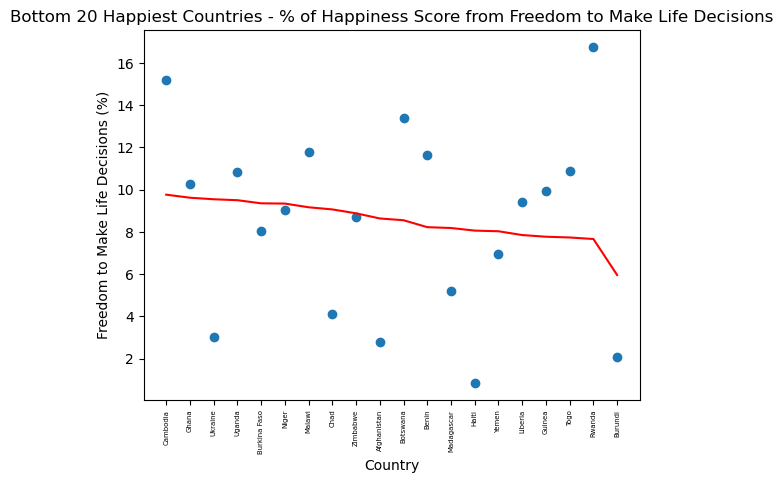

In [21]:
#scatter plots and line regression on bottom 20 happiest countries
#does getting more happiness from freedom to make life decisions correlate to a lower happiness score

#axis
x_freedom_bot20 = bottom_happy_20["Country"]
y_freedom_bot20 = bottom_happy_20["% of Happiness from Freedom"]

#line regression and line equation
freelast20_slope, freelast20_int, freelast20_r, freelast20_p, freelast20_std_err = st.linregress(bottom_happy, y_freedom_bot20)
freelast20_fit = freelast20_slope * bottom_happy + freelast20_int
freelast20_line = "y = " + str(round(freelast20_slope, 2)) + "x + " + str(round(freelast20_int, 2))

#plot scatter and line regression
plt.scatter(x_freedom_bot20, y_freedom_bot20)
plt.plot(x_freedom_bot20, freelast20_fit, color='red')
plt.title("Bottom 20 Happiest Countries - % of Happiness Score from Freedom to Make Life Decisions")
plt.xlabel("Country")
plt.ylabel("Freedom to Make Life Decisions (%)")
plt.annotate(freelast20_line, (5,30), fontsize=15, color='red')
             

#style xticks
plt.xticks(bottom_country, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Freedom in the Bottom 20 Happiest Countries is: {freelast20_r**2}')

plt.show()

##### Plot impact of Social Support on Life Expectancy


The r-value of Support is: 0.01337989255602582


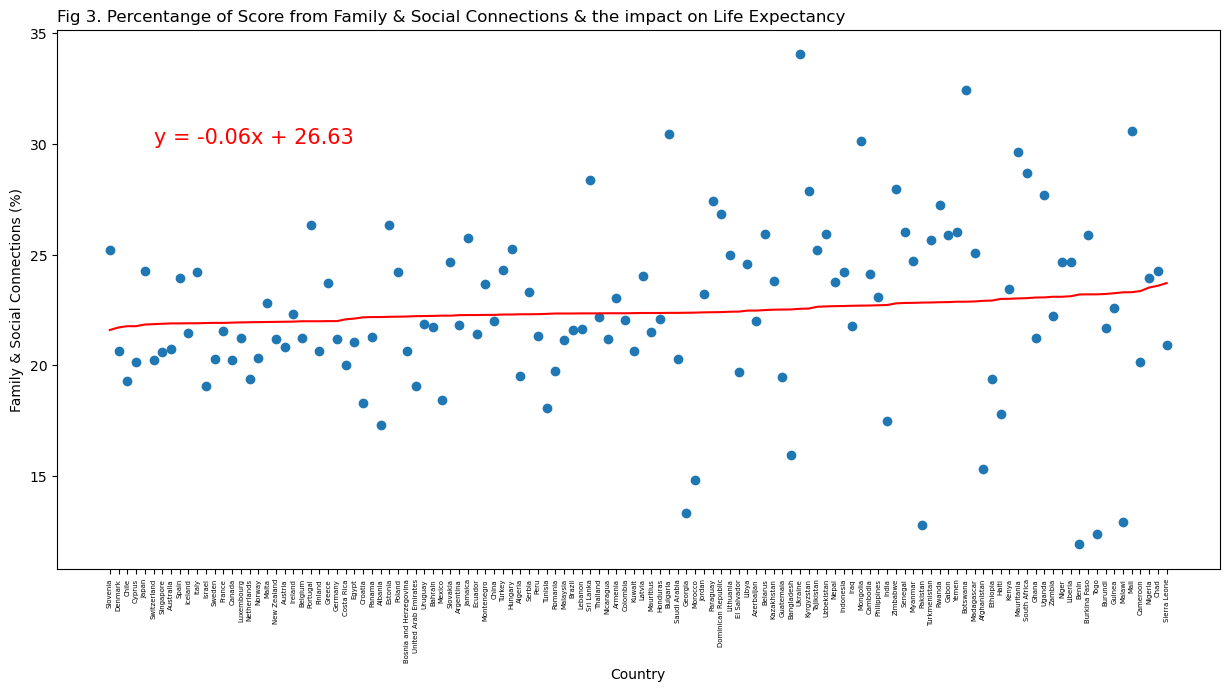

In [22]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a greater life expectancy

#axis
x_suplife_percent = life_social_freedom_df["Country"]
y_suplife_percent = life_social_freedom_df["% of Happiness from Support"]

#line regression and line equation
suplife_slope, suplife_int, suplife_r, suplife_p, suplife_std_err = st.linregress(life, y_suplife_percent)
suplife_fit = suplife_slope * life + suplife_int
suplife_line = "y = " + str(round(suplife_slope, 2)) + "x + " + str(round(suplife_int, 2))

#increase plot size to accommodate all countries
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter and line regression
plt.scatter(x_suplife_percent, y_suplife_percent)
plt.plot(x_suplife_percent, suplife_fit, color='red')
plt.title("Fig 3. Percentange of Score from Family & Social Connections & the impact on Life Expectancy", loc='left')
plt.xlabel("Country")
plt.ylabel("Family & Social Connections (%)")
plt.annotate(suplife_line, (5,30), fontsize=15, color='red')


#style xticks
plt.xticks(life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {suplife_r**2}')

plt.show()

The r-value of Support in the Top 20 Happiest Countries is: 0.0746206573130324


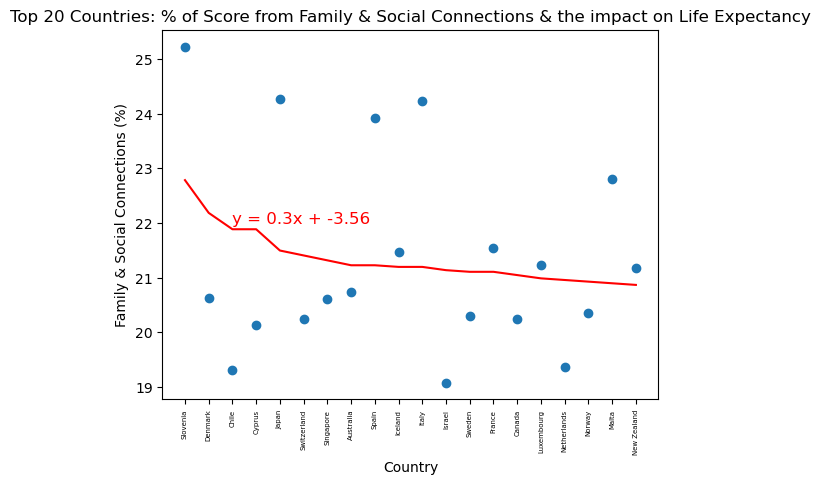

In [23]:
#axis
x_support_top20 = top_life_20["Country"]
y_support_top20 = top_life_20["% of Happiness from Support"]


#line regression and line equation
suplife20_slope, suplife20_int, suplife20_r, suplife20_p, suplife20_std_err = st.linregress(top_life, y_support_top20)
suplife20_fit = suplife20_slope * top_life + suplife20_int
suplife20_line = "y = " + str(round(suplife20_slope, 2)) + "x + " + str(round(suplife20_int, 2))

#plot scatter and line regression
plt.scatter(x_support_top20, y_support_top20)
plt.plot(x_support_top20, suplife20_fit, color='red')
plt.title("Top 20 Countries: % of Score from Family & Social Connections & the impact on Life Expectancy")
plt.xlabel("Country")
plt.ylabel("Family & Social Connections (%)")
plt.annotate(suplife20_line, (2,22), fontsize=12, color='red')

#style xticks
plt.xticks(top_life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support in the Top 20 Happiest Countries is: {suplife20_r**2}')

plt.show()

The r-value of Support in the Top 20 Happiest Countries is: 0.008967868750811576


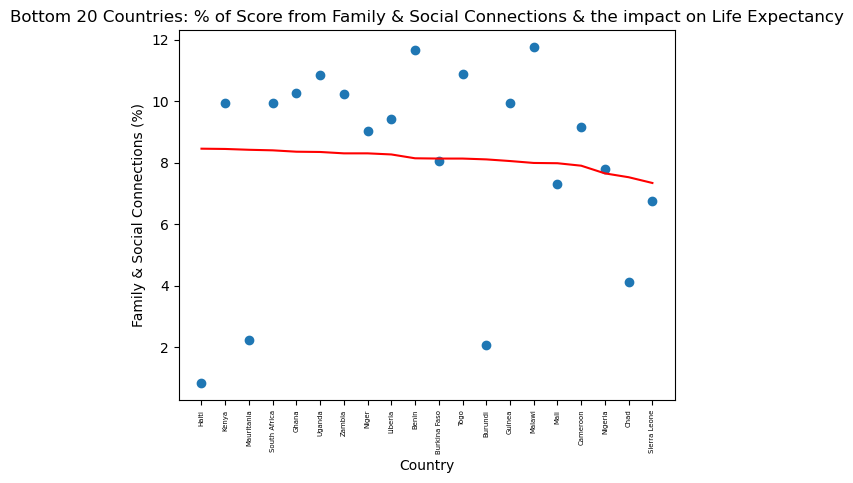

In [24]:
#axis
x_freedom_bot20 = bottom_life_20["Country"]
y_freedom_bot20 = bottom_life_20["% of Happiness from Freedom"]

#line regression and line equation
freelast20_slope, freelast20_int, freelast20_r, freelast20_p, freelast20_std_err = st.linregress(bottom_life, y_freedom_bot20)
freelast20_fit = freelast20_slope * bottom_life + freelast20_int
freelast20_line = "y = " + str(round(freelast20_slope, 2)) + "x + " + str(round(freelast20_int, 2))

#plot scatter and line regression
plt.scatter(x_freedom_bot20, y_freedom_bot20)
plt.plot(x_freedom_bot20, freelast20_fit, color='red')
plt.title("Bottom 20 Countries: % of Score from Family & Social Connections & the impact on Life Expectancy")
plt.xlabel("Country")
plt.ylabel("Family & Social Connections (%)")
plt.annotate(freelast20_line, (2,22), fontsize=12, color='red')

#style xticks
plt.xticks(bottom_life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support in the Top 20 Happiest Countries is: {freelast20_r**2}')

plt.show()

##### Plot impact of Freedom to Make Life Decisions on Life Expectancy

The r-value of Support is: 0.015646444375534092


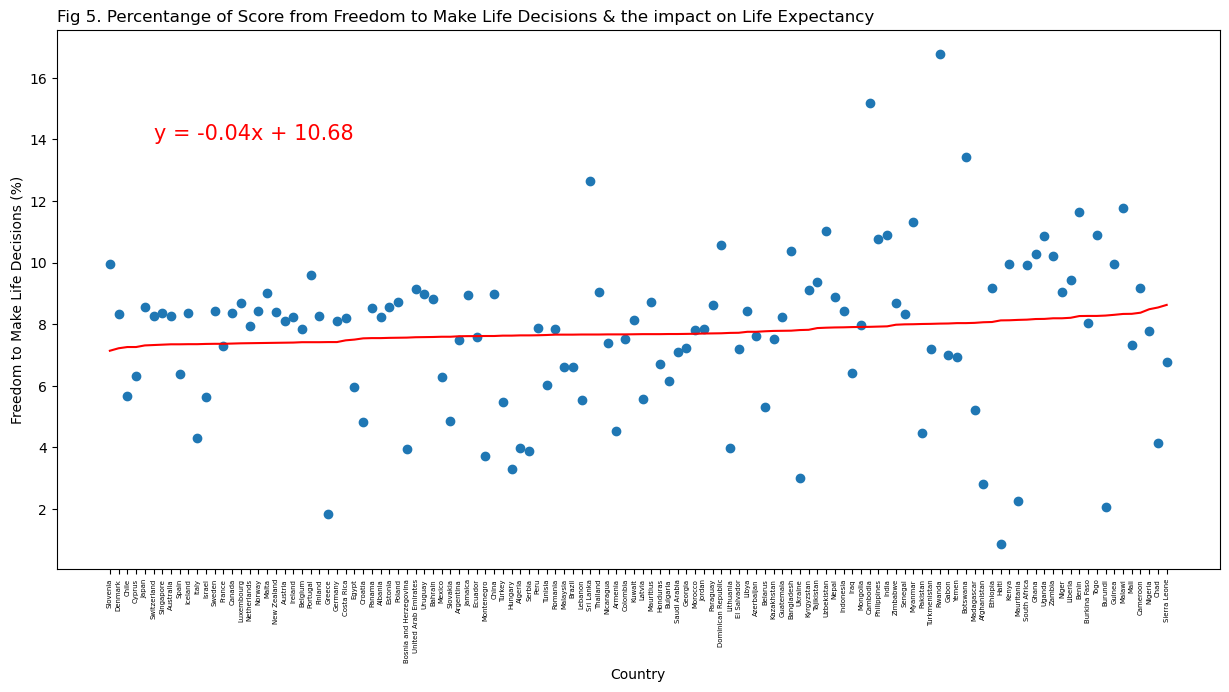

In [25]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a greater life expectancy

#axis
x_freelife_percent = life_social_freedom_df["Country"]
y_freelife_percent = life_social_freedom_df["% of Happiness from Freedom"]

#line regression and line equation
freelife_slope, freelife_int, freelife_r, freelife_p, freelife_std_err = st.linregress(life, y_freelife_percent)
freelife_fit = freelife_slope * life + freelife_int
freelife_line = "y = " + str(round(freelife_slope, 2)) + "x + " + str(round(freelife_int, 2))

#increase plot size to accommodate all countries
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter and line regression
plt.scatter(x_freelife_percent, y_freelife_percent)
plt.plot(x_freelife_percent, freelife_fit, color='red')
plt.title("Fig 5. Percentange of Score from Freedom to Make Life Decisions & the impact on Life Expectancy", loc='left')
plt.xlabel("Country")
plt.ylabel("Freedom to Make Life Decisions (%)")
plt.annotate(freelife_line, (5,14), fontsize=15, color='red')


#style xticks
plt.xticks(life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {freelife_r**2}')

plt.show()

The r-value of Support is: 0.006443506475031611


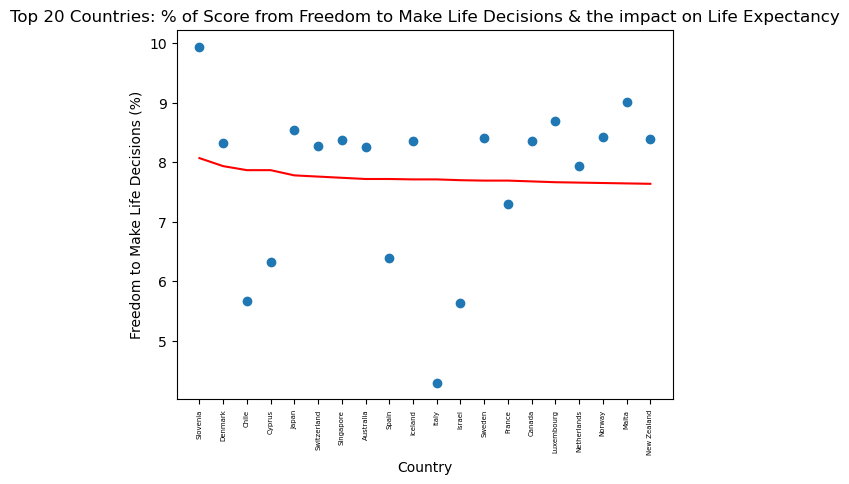

In [26]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a greater life expectancy

#axis
x_freelife20_percent = top_life_20["Country"]
y_freelife20_percent = top_life_20["% of Happiness from Freedom"]

#line regression and line equation
freelife20_slope, freelife20_int, freelife20_r, freelife20_p, freelife20_std_err = st.linregress(top_life, y_freelife20_percent)
freelife20_fit = freelife20_slope * top_life + freelife20_int
freelife20_line = "y = " + str(round(freelife20_slope, 2)) + "x + " + str(round(freelife20_int, 2))


#plot scatter and line regression
plt.scatter(x_freelife20_percent, y_freelife20_percent)
plt.plot(x_freelife20_percent, freelife20_fit, color='red')
plt.title("Top 20 Countries: % of Score from Freedom to Make Life Decisions & the impact on Life Expectancy")
plt.xlabel("Country")
plt.ylabel("Freedom to Make Life Decisions (%)")
plt.annotate(freelife20_line, (5,30), fontsize=15, color='red')


#style xticks
plt.xticks(top_life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {freelife20_r**2}')

plt.show()

The r-value of Support is: 0.008967868750811576


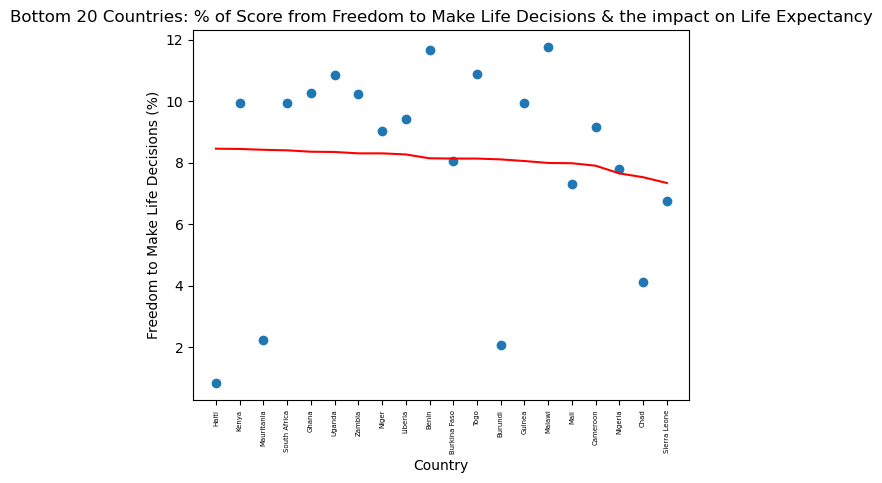

In [27]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a greater life expectancy

#axis
x_freelifebot_percent = bottom_life_20["Country"]
y_freelifebot_percent = bottom_life_20["% of Happiness from Freedom"]

#line regression and line equation
freelifebot_slope, freelifebot_int, freelifebot_r, freelifebot_p, freelifebot_std_err = st.linregress(bottom_life, y_freelifebot_percent)
freelifebot_fit = freelifebot_slope * bottom_life + freelifebot_int
freelifebot_line = "y = " + str(round(freelifebot_slope, 2)) + "x + " + str(round(freelifebot_int, 2))


#plot scatter and line regression
plt.scatter(x_freelifebot_percent, y_freelifebot_percent)
plt.plot(x_freelifebot_percent, freelifebot_fit, color='red')
plt.title("Bottom 20 Countries: % of Score from Freedom to Make Life Decisions & the impact on Life Expectancy")
plt.xlabel("Country")
plt.ylabel("Freedom to Make Life Decisions (%)")
plt.annotate(freelifebot_line, (5,30), fontsize=15, color='red')


#style xticks
plt.xticks(bottom_life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {freelifebot_r**2}')

plt.show()

In [28]:
#mean values of the top 20
top_happy_20.mean()

C:\Users\polly\AppData\Local\Temp\ipykernel_12740\3536741599.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_happy_20.mean()


happiness_score                 7.150800
family                          1.469205
freedom                         0.570015
Life expectancy                81.605000
% of Happiness from Support    20.546666
% of Happiness from Freedom     7.959354
dtype: float64

In [29]:
#mean values of the bottom 20
bottom_happy_20.mean()

C:\Users\polly\AppData\Local\Temp\ipykernel_12740\252584923.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bottom_happy_20.mean()


happiness_score                 3.763700
family                          0.869405
freedom                         0.324312
Life expectancy                62.810000
% of Happiness from Support    22.988221
% of Happiness from Freedom     8.543812
dtype: float64